#**Classificação: melhorando o desempenho com XGBoost**

##**Aula 1 - Conhecendo os dados**

###**Importando os dados**

In [ ]:
url = 'https://raw.githubusercontent.com/alura-cursos/classificacao_xgboost/main/Dados/doenca_cardiaca.csv'

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presenca
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Ausencia
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presenca
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Ausencia
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Ausencia


###**Explorando os dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    270 non-null    int64  
 1   Sexo                     270 non-null    int64  
 2   Tipo dor                 270 non-null    int64  
 3   Pressao arterial         270 non-null    int64  
 4   Colesterol               270 non-null    int64  
 5   Glicemia jejum >120      270 non-null    int64  
 6   Resultados ECG           270 non-null    int64  
 7   Frequencia cardiaca max  270 non-null    int64  
 8   Dor exercicio            270 non-null    int64  
 9   Depressao ST             270 non-null    float64
 10  Inclinacao ST            270 non-null    int64  
 11  Numero vasos fluro       270 non-null    int64  
 12  Teste cintilografia      270 non-null    int64  
 13  Doenca cardiaca          270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
import seaborn as sns

<Axes: xlabel='Doenca cardiaca', ylabel='Idade'>

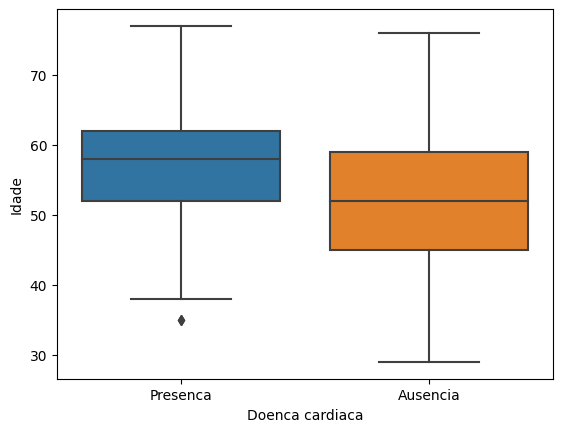

In [ ]:
sns.boxplot(x='Doenca cardiaca', y='Idade', data=df)

<Axes: xlabel='Sexo', ylabel='count'>

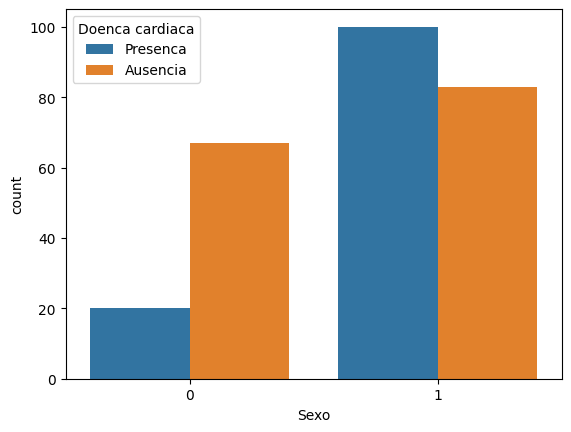

In [ ]:
sns.countplot(x='Sexo', hue='Doenca cardiaca', data=df)

<Axes: xlabel='Tipo dor', ylabel='count'>

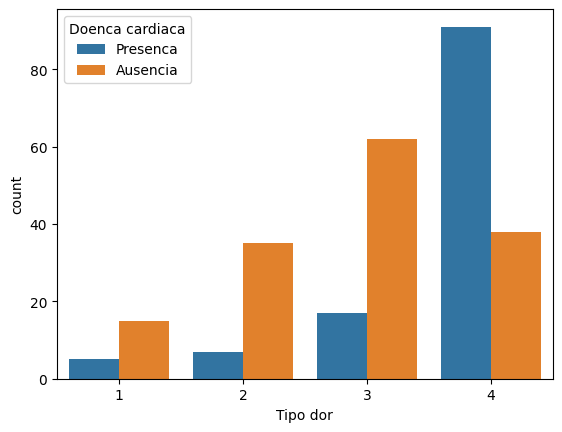

In [ ]:
sns.countplot(x='Tipo dor', hue='Doenca cardiaca', data=df)

In [ ]:
df['Doenca cardiaca'].value_counts()

Ausencia    150
Presenca    120
Name: Doenca cardiaca, dtype: int64

In [ ]:
df['Doenca cardiaca'] = df['Doenca cardiaca'].map({'Presenca': 1, 'Ausencia': 0})

In [ ]:
df

,Idade,Sexo,Tipo dor,Pressao arterial,Colesterol,Glicemia jejum >120,Resultados ECG,Frequencia cardiaca max,Dor exercicio,Depressao ST,Inclinacao ST,Numero vasos fluro,Teste cintilografia,Doenca cardiaca
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0
